# Libraries/Imports

In [10]:
import numpy as np
import scipy as sp
from numpy.linalg import solve
from numpy.linalg import qr
from numpy.linalg import svd
from scipy.linalg import diagsvd
from scipy.linalg import pinv
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Question 1
Given the data points
$$(2,3), (3,2), (5,1), (6,0)$$
derive the equation of the least-squares line
$$y = mx + b$$
that best fits the given data points. Solve the system using the QR factorization, the SVD, and the Normal Equations.

## QR Factorization
The matrix created from the data points:
$$\begin{bmatrix}
2, 1 \\ 
3, 1 \\
5, 1 \\
6, 1
\end{bmatrix}
\begin{bmatrix}
m \\ b
\end{bmatrix}
=
\begin{bmatrix}
3 \\
2 \\
1 \\
0
\end{bmatrix}
$$

To solve using $QR$ factorization, we first factor $A$ as $QR$. <br>
Next, we pre-multiply with $Q^T$, giving $Rx=Q^Tb$ ($Q^TQ$ is the identity matrix)<br>
Now, we can call `solve()` with $R$ and $Q^Tb$

In [3]:
A = np.matrix([[2,1],[3,1],[5,1],[6,1]])
b = np.matrix([3,2,1,0]).T

In [4]:
Q, R = qr(A)

x = solve(R, Q.T @ b)
x

matrix([[-0.7],
        [ 4.3]])

### Solution
$$x = \begin{bmatrix} -0.7 \\ 4.3 \end{bmatrix}$$

## SVD Factorization
To solve using $SVD$ factorization, we first factor $A$ as $SVD$.    
Now, we create the pseudo-inverse by taking the transpose of the the parts in reverse order, except with $\Sigma$, we take the take the  reciprocals before transposing.    
Last, we can call pre-multiply $b$ with $A^\dagger$, as $A^\dagger A$ is the identity matrix

$$
Ax = b \\
U \Sigma V^T x = b \\
A^\dagger = V \Sigma^\dagger U^T \\
A^TA = I \\
Ix = A^\dagger b \\
x = A^\dagger b \space\space \text{or} \space\space V \Sigma^\dagger U^T b
$$

In [5]:
U, sigma, VT = svd(A)
Sigma = diagsvd(sigma, len(A), len(A.T))
PseudoA = (VT).T @ pinv(Sigma) @ U.T 

print(PseudoA @ A)
x = PseudoA @  b
x

[[ 1.00000000e+00 -5.55111512e-17]
 [-2.22044605e-15  1.00000000e+00]]


matrix([[-0.7],
        [ 4.3]])

### Solution
$$x = \begin{bmatrix} -0.7 \\ 4.3 \end{bmatrix}$$

# Normal Equations

The normal equation is that which minimizes the sum of the square differences between the left and right sides:<br>
$$
A^TAx = A^Tb
$$

In this case, I would just use `solve(A.T @ A, A.T @ b)` and see. You could utilize QR factorizations (or any other for that matter).

### Solution

In [6]:
solvex = solve(A.T @ A, A.T @ b)
solveqr = solve(R.T @ Q.T @ Q @ R, R.T @ Q.T @ b)
solvesvd = solve(VT.T @ Sigma.T @ U.T @ U @ Sigma @ VT, VT.T @ Sigma.T @ U.T @ b)

print(f"{solvex}\n\n{solveqr}\n\n{solvesvd}")

[[-0.7]
 [ 4.3]]

[[-0.7]
 [ 4.3]]

[[-0.7]
 [ 4.3]]


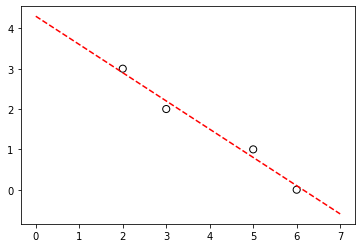

In [8]:
X1 = np.array(A[:,0])
Y1 = np.array(b)
x = np.linspace(0,7,35)
y = (-0.7)*x+(4.3)
plt.scatter(X1,Y1, edgecolor='k',c='none',s=50)
plt.plot(x,y, "r--")

# Question 2
Use functions from `scipy.optimize.minimize` to minimize:<br><br>
The Rosenbrock function
$$
f(x_1,x_2)=(7−x_1)^2 +100(x_2 −x^2_1)^2 +10
$$

In [9]:
minimize()

AttributeError: module 'scipy' has no attribute 'optimize'

# Question 3
Use functions from `scipy.optimize.minimize` to minimize:<br><br>
The Booth function
$$
f(x_1,x_2)=(x_1 +2x_2 −7)^2 +(2x_1 +x_2 −5)^2
$$

 
The Minimum Occurs at (x, y) = (x0, x1) =  [-0.92857143  2.35714286]
 
And The Minimum Value =  -37.35714285714286
 
Other Statistics:
     fun: -37.35714285714286
     jac: array([-4.26325641e-14,  2.48689958e-14])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([-0.92857143,  2.35714286])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minimize.py:547: RuntimeWarning: Method CG does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/var/folders/90/b16ybj8s2gv__lhxf5ttmvj40000gn/T/ipykernel_99917/3003740835.py:61: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


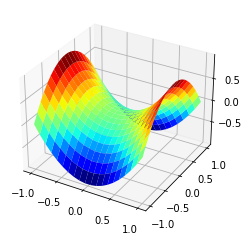

In [11]:
'''
Function Optimization Using ==> scipy.opimize
The Following Minimization Algoriths Are Implemented:
    minimize(method=’Nelder-Mead’)  <=
    minimize(method=’Powell’)       <=
    minimize(method=’CG’)           <=
    minimize(method=’BFGS’)         <=
    minimize(method=’Newton-CG’)    <= Requires The Gradient & Hessian
    minimize(method=’L-BFGS-B’)     <=
    minimize(method=’TNC’)          <= 
    minimize(method=’COBYLA’)       <= 
    minimize(method=’SLSQP’)        <= 
    minimize(method=’trust-constr’) <=
    minimize(method=’dogleg’)       <= Requires The Gradient & Hessian
    minimize(method=’trust-ncg’)    <= Requires The Gradient & Hessian
    minimize(method=’trust-krylov’) <= Requires The Gradient & Hessian
    minimize(method=’trust-exact’)  <= Requires The Gradient & Hessian 
'''
# Function Minimization:
#
from numpy import array
from scipy.optimize import minimize

a = 5 ; b = 30; c = 0 
#def f(x): 
#    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2 + c

#def gradient(x):
#    return array([-2*(a - x[0]) - 4.*b*x[0]*(x[1] - x[0]**2), 
#                     2*b*(x[1] - x[0]**2)])

#def hessian(x):
#    return array([[2 - 4*b*x[1] + 12*b*x[0]**2, -4*b*x[0] ], 
#                  [-4*b*x[0], 2*b]])

def f(x): 
    return 5.*x[0]**2 + 3.*x[1]**2 - 2.*x[0]*x[1] + 14.*x[0] - 16.*x[1] - 12.0
def gradient(x):
      return array([10.*x[0] - 2.* x[1] +14, -2*x[0]+ 6*x[1] - 16])
def hessian(x):
    return array([[10,-2], [-2,6]])

x0 = array([0, 0])
result = minimize(f, x0, method = 'CG',
                  jac = gradient, hess = hessian, tol=1.e-7)
print(" ")
print("The Minimum Occurs at (x, y) = (x0, x1) = ", result.x)
print(" ")
print("And The Minimum Value = ", f(result.x) ) 
print(" ")
print("Other Statistics:" ) 
print( result )          
#
# Plot Function: 
#      
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d') 

x = linspace( -1, 1, 20)
y = linspace( -1, 1, 20)
 
x, y = meshgrid(x,y)
z = x**2 - y**2
#z = ( a - x )**2 + b *( y - x**2 )**2 + c

surf = ax.plot_surface(x, y, z, 
       rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.show()